In [1103]:
# importing all required libraries
import pandas as pd
import numpy as np

# importing plotting libraries
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

#ignoring warnings
import warnings
warnings.filterwarnings('ignore')

#Import the plotly libraries
import plotly.express as px

## Importing Data file

In [1104]:
# import companies files using pandas

cps = pd.read_csv('./companies.csv')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 25: invalid start byte

In [ ]:
# since encoding is not utf-8, we have to find encoding of the file. 
# to do that we can use many techniques.

# Tried determining the encoding using chardet and couldn't find the proper encoding.

# After several google searches and documentation reading, found that palmos is encoding type.
# gone through --> https://docs.python.org/3/library/codecs.html#python-specific-encodings 
# and found there are some python specific encodings and also tried these.

# And pandas could read the file with 'palmos' without errors. So, assuming it's the encoding and going farword

In [1105]:
# Let's try to read data again with palmos encoding

cps_org = pd.read_csv('./companies.csv', encoding='palmos')

In [1106]:
# we could see data using head() method
cps_org.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [1107]:
# similarly reading reounds2 file

rds_org = pd.read_csv('./rounds2.csv', encoding='palmos')

In [1108]:
# reading data using head()
rds_org.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


### Inspecting rounds2 data

In [1109]:
# info gives column names, count of non-null and data types of each column
rds_org.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [1110]:
# lets use desribe() to get data info for numeric types. currently raised_amount_usd is of foat64 
# and only that can be seen
rds_org.describe()

,raised_amount_usd
count,9.495900e+04
mean,1.042687e+07
std,1.148212e+08
min,0.000000e+00
25%,3.225000e+05
50%,1.680511e+06
75%,7.000000e+06
max,2.127194e+10


In [1111]:
# there are organisations with same name in caps and smalls. let's convert them.

In [1112]:
# first lets, conver to lower case
rds_org.company_permalink = rds_org.company_permalink.str.lower()
rds_org.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [1113]:
# as we can see now unqiue values are merged
print(rds_org.company_permalink.value_counts())

/organization/solarflare                           19
/organization/semprius                             18
/organization/exagen-diagnostics                   18
/organization/quellan                              18
/organization/tigo-energy                          17
                                                   ..
/organization/beam-2                                1
/organization/the-eastman-egg-company               1
/organization/shea-radiance                         1
/organization/a-family-first-community-services     1
/organization/video-medicine                        1
Name: company_permalink, Length: 66368, dtype: int64


### Inspecting companies data

In [1114]:
cps_org.permalink.value_counts()

/Organization/Quixhop                       1
/Organization/Nettwerk-Music-Group          1
/Organization/Qualysense                    1
/Organization/Shoplandia-Inc                1
/Organization/Shiphawk                      1
                                           ..
/Organization/Halo-Neuroscience             1
/Organization/Timeet                        1
/Organization/Teddy-The-Guardian            1
/Organization/Kingdom-Enterprise-Systems    1
/Organization/Aptela                        1
Name: permalink, Length: 66368, dtype: int64

In [1115]:
# It seems all the rows are unique
# Any how, converting permalink column to lower so that it will be easy for us to merge leter with rounds data

In [1116]:
cps_org.permalink = cps_org.permalink.str.lower()

In [1117]:
cps_org.permalink.value_counts()

/organization/global-crossing                                   1
/organization/gm-europe                                         1
/organization/youmove-me                                        1
/organization/accent-optical-technologies                       1
/organization/computer-systems-and-software-innovation-group    1
                                                               ..
/organization/caktus                                            1
/organization/web-care-lbj-gmbh                                 1
/organization/tweelx                                            1
/organization/shenzhen-zhizun-automobile-leasing-co-ltd         1
/organization/video-medicine                                    1
Name: permalink, Length: 66368, dtype: int64

In [1118]:
# after conversion alos, this is same.. so all the rows are unique
# also asusming that there no other discrepencies amoung the company permalink column.

# Chekcpoint 1: data cleaning

### we can now get uniques companies count
__answer__ for checkpoint 1 table

In [1119]:
# calculate uniques in company column

len(rds_org.company_permalink.unique())

66368

### we can now get uniques companies count of companies.csv data
__answer__ for checkpoint 1 table


In [1120]:
len(cps_org.permalink.unique())

66368

__answers__ for 3 and 4 in checkpoint-1 can be determined from these 2 values

In [1121]:
# "permalink" is the name of the column which can be used as the unique keys

In [1122]:
# from the difference, we can say there are no uniqies in rounds2 
# which are not present in compnaies, assuming no descripencies

rds_org[~rds_org['company_permalink'].str.upper().isin(cps_org['permalink'].str.upper())]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd


## merging dataframes to master 

#### converting column names

In [1123]:
cps_org=cps_org.rename(columns={"permalink": "company_permalink"})

## Merging two data frames

In [1124]:
# merging 2 dataframe with left join as we need to get all rows in rounds2 dataframe and on 'company_permalink' column
master = rds_org.merge(cps_org, how='left', on='company_permalink')

#### creating a backup

In [1125]:
# storing a backup of original merged dataframe
master_bck = master.copy(deep=True)

In [1126]:
master.shape

(114949, 15)

#### cleaning master dataframe

In [1127]:
# checking for null counts
# also, getting percentage of each column's missing values and rounding to 2 decimals

round(100*(master.isnull().sum()/len(master.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

##### funding_round_code and founded_at columns have % of missing values as ~72.91 and 17.85 which are very high to either remove or impute. 
##### So, lets remove those columns

##### similarly, I assume, 'homepage_url', 'state_code' , 'region', 'city' columns are also not useful for our analysis

In [1128]:
# so removing these columns

master.drop(columns=['funding_round_code', 'homepage_url', 'state_code' , 'region', 'city', 'founded_at'], inplace=True)

In [1129]:
# checking null values %
round(100*(master.isnull().sum()/len(master.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
name                        0.00
category_list               2.97
status                      0.00
country_code                7.55
dtype: float64

##### raised_amount_usd column is our driving factor, so can't remove or impute those values

##### category_list and country_code have very less missing values. These rows can be removed but this might effect out analysis for funding type. 
##### So, lets first calculate the funding type and then come back to these columns

## Checkpoint 2: Funding type

In [1130]:
# sparkFunds wants to invest in the funding_types which come under 5M to 15M USD category.
# let's take average of each funding type and see which comes under the category.
# we might also have to look at median along with mean

In [1131]:
# we currently have data of these funding types
master['funding_round_type'].value_counts()

venture                  55494
seed                     30524
debt_financing            6895
angel                     6094
undisclosed               4897
equity_crowdfunding       3257
private_equity            2285
grant                     2200
convertible_note          1817
post_ipo_equity            638
product_crowdfunding       410
non_equity_assistance      191
post_ipo_debt              152
secondary_market            95
Name: funding_round_type, dtype: int64

#### Finding out average funding amount for venture, angel, seed and private equity type
##### as we are interested in only these types (as clearly mentioned in Excel sheet and upgrad site)

In [1132]:
# first, get only data of these 4 funding types
master_1 = master.loc[master['funding_round_type'].isin(['angel','private_equity','seed','venture'])]

In [1133]:
# now lets get the average funding of each of these types and put it into a new DF
ft_means_frame = pd.DataFrame(master_1.groupby('funding_round_type')['raised_amount_usd'].mean().sort_values(ascending=False))

In [1134]:
# also, let's take the medians of each of these types and put it into another DF
ft_median_frame = pd.DataFrame(master_1.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending=False))

##### __answers__ for checkpoint 2 - table -2

In [1135]:
# here we get the average funding amount of each type we are interested in
ft_means_frame.head()

,raised_amount_usd
funding_round_type,
private_equity,7.330859e+07
venture,1.174895e+07
angel,9.586945e+05
seed,7.198180e+05


In [1136]:
ft_median_frame.head()

,raised_amount_usd
funding_round_type,
private_equity,20000000.0
venture,5000000.0
angel,400000.0
seed,275000.0


##### There are huge differences between median and mean

In [1137]:
# we also have a criteria that SparkFunds only interested in investing between 5 to 15 million USD.
# so, let's see if any of these comes under that category

ft_means_frame.loc[(ft_means_frame['raised_amount_usd'] >= 5_000_000.0) & 
                   (ft_means_frame['raised_amount_usd'] <= 15_000_000.0)]

,raised_amount_usd
funding_round_type,
venture,1.174895e+07


In [1138]:
# same with median

ft_median_frame.loc[(ft_median_frame['raised_amount_usd'] >= 5_000_000.0) & 
                   (ft_median_frame['raised_amount_usd'] <= 15_000_000.0)]

,raised_amount_usd
funding_round_type,
venture,5000000.0


##### we can clearly see that __venture__ is the only type that comes under this category even with mean and median values

# Checkpoint - 3

#### since, we get the funding type, let's us only the data related to funding type -- venture

In [1139]:
# taking only funding_type == 'venture'
master = master.loc[master['funding_round_type'].isin(['venture'])]

## Country Analysis

In [1140]:
# Basically, we need top 3 english speaking countries for sparkFunds to invest from.

# let's create a datafrmae top9 as sparkFunds is interested only in top 9 countries which have received the highest total funding
# also, this is accross all sectors of venture type

# since, we can't check entile list of countries for english speaking, let's first take top 9 and then check the tomp 3 english speaking out of them

In [1141]:
# we can see, excpet for nan, all other country_codes are in valid form
master['country_code'].unique()

array(['IND', 'USA', nan, 'CHN', 'CAN', 'GBR', 'FRA', 'ROM', 'KOR', 'IRL',
       'SWE', 'SGP', 'ESP', 'NLD', 'RUS', 'BEL', 'JPN', 'BGR', 'HUN',
       'DEU', 'CHE', 'ITA', 'HKG', 'TUR', 'BRA', 'FIN', 'PRT', 'SVN',
       'THA', 'DNK', 'TWN', 'ISR', 'NOR', 'LTU', 'ISL', 'ZAF', 'MEX',
       'AUS', 'NZL', 'MUS', 'AUT', 'ARG', 'PHL', 'MNE', 'PSE', 'MYS',
       'POL', 'LVA', 'GGY', 'EST', 'LBN', 'GRC', 'VNM', 'IDN', 'CYP',
       'SVK', 'ARE', 'EGY', 'ARM', 'BGD', 'TUN', 'KEN', 'COL', 'CZE',
       'CMR', 'LUX', 'PRI', 'CYM', 'PER', 'ECU', 'CHL', 'NGA', 'TTO',
       'URY', 'JOR', 'PAK', 'HRV', 'UKR', 'CRI', 'BMU', 'PAN', 'MMR',
       'KAZ', 'MAR', 'LIE', 'GTM', 'SAU', 'TAN', 'KNA', 'SEN', 'MLT',
       'MCO', 'BAH', 'GHA', 'RWA', 'MOZ', 'KWT', 'UGA', 'LAO', 'MKD',
       'BWA', 'BHR', 'MAF', 'GIB'], dtype=object)

In [1142]:
# To do that, we have to groupby country code and then sum the raised_amount_usd of each group

top9 = pd.DataFrame(master.groupby(by='country_code')['raised_amount_usd'].sum().sort_values(ascending=False).head(n=9))

In [1143]:
top9.head(n=9)

,raised_amount_usd
country_code,
USA,4.225108e+11
CHN,3.983542e+10
GBR,2.024563e+10
IND,1.439186e+10
CAN,9.583332e+09
FRA,7.259537e+09
ISR,6.907515e+09
DEU,6.346960e+09
JPN,3.363677e+09


##### amoung these CHN - China, FRA - France, DEU - Germany, JPN - Japan are not considered under english speaking countries

##### __asnwers__ for checkpoint-3 - table-3.1 
##### so, top 3 english speaking countries are __USA__ - United States, __GBR__ - United Kingdom, __IND__ - India

# Chekcpoint - 4

In [1144]:
# taking only the top 3 countries into the data frame for further analysis
master = master.loc[master['country_code'].isin(['USA','GBR','IND'])]

## Sector Analysis

In [1145]:
# to analyze sectors, first we need to separate the column values as there are many columns with multiple entries
# we can do that by simply taking the first entry of the list,  assuming that the first entry is the major category.

# we will od this by splitting the value on '|' and take the first one in the split and then assign it to a new column 'primary_sector'

In [1146]:
master['category_list'].value_counts()

Biotechnology                                             4728
Software                                                  3391
Health Care                                               1258
Clean Technology                                          1090
Enterprise Software                                       1053
                                                          ... 
Crowdfunding|Investment Management|Portals|Real Estate       1
SEO|Video|Web Design|Web Development                         1
Electronics|Energy|Marketplaces                              1
Healthcare Services|Mechanical Solutions|Technology          1
Match-Making|Online Dating|Social Media                      1
Name: category_list, Length: 8377, dtype: int64

In [1147]:
master['primary_sector'] = master['category_list'].apply(lambda x: x.split('|')[0] if pd.notnull(x) else x)

In [1148]:
# also, let's take the percentage of null values

round(100*(master.isnull().sum()/len(master.index)), 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          6.36
name                       0.00
category_list              0.92
status                     0.00
country_code               0.00
primary_sector             0.92
dtype: float64

##### It seems there are some values with null in category_list/primary_sectory column. we can simply remove those as the % is very less ~= 0.92%

In [1149]:
master = master[~master['primary_sector'].isnull()]

In [1150]:
# now we can see all the null values are removed
round(100*(master.isnull().sum()/len(master.index)), 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          6.01
name                       0.00
category_list              0.00
status                     0.00
country_code               0.00
primary_sector             0.00
dtype: float64

### Reading mapping file to map the primary_sector to main_sector

In [1151]:
mapping = pd.read_csv('./mapping.csv', encoding='palmos')

In [1152]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [1153]:
# we don't need NaN row 
mapping.drop(index=0, inplace=True)

In [1154]:
# we don't need Blanks column
mapping.drop(columns='Blanks', inplace=True)

In [1155]:
mapping.head()

,category_list,Automotive & Sports,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
1,3D,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,1
5,Active Lifestyle,0,0,0,1,0,0,0,0


In [1156]:
# now we will melt the df to simple category_list vs type instead of 1s and 0s.
# to do that, we will use melt

# taken directly from the live session. 

In [1157]:
help(pd.melt)

Help on function melt in module pandas.core.reshape.melt:

melt(frame: 'DataFrame', id_vars=None, value_vars=None, var_name=None, value_name='value', col_level=None, ignore_index: bool = True) -> 'DataFrame'
    Unpivot a DataFrame from wide to long format, optionally leaving identifiers set.
    
    This function is useful to massage a DataFrame into a format where one
    or more columns are identifier variables (`id_vars`), while all other
    columns, considered measured variables (`value_vars`), are "unpivoted" to
    the row axis, leaving just two non-identifier columns, 'variable' and
    'value'.
    
    Parameters
    ----------
    id_vars : tuple, list, or ndarray, optional
        Column(s) to use as identifier variables.
    value_vars : tuple, list, or ndarray, optional
        Column(s) to unpivot. If not specified, uses all columns that
        are not set as `id_vars`.
    var_name : scalar
        Name to use for the 'variable' column. If None it uses
        ``fram

In [1158]:
# store the value and id variables in two separate arrays

# store the value variables in one series
value_vars = list(mapping.columns[1:])
print(value_vars)

['Automotive & Sports', 'Cleantech / Semiconductors', 'Entertainment', 'Health', 'Manufacturing', 'News, Search and Messaging', 'Others', 'Social, Finance, Analytics, Advertising']


In [1159]:
# take the setdiff() to get the rest  of the variables
id_vars = list(np.setdiff1d(mapping.columns, value_vars))
print(id_vars)

['category_list']


In [1160]:
mapping = pd.melt(mapping, id_vars=id_vars, value_vars=value_vars)

In [1161]:
# now store only with having value=1 
mapping = mapping[mapping['value']==1]
mapping.drop(columns='value',inplace=True)

In [1162]:
# renaming variable column to main_sector
mapping = mapping.rename(columns={'variable':'main_sector'})

#### now we have mapping DF ready to compare with master DF

In [1163]:
# converting all the primary_sector to lower case

master['primary_sector'] = master['primary_sector'].str.lower()

In [1164]:
# converting category_list and main_sector to lower

mapping['category_list'] = mapping['category_list'].str.lower()
mapping['main_sector'] = mapping['main_sector'].str.lower()

In [1165]:
mapping.shape

(687, 2)

#### now let's map the primary_sectory to main_sector  and store it in master DF

In [1166]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html

master = master.merge(mapping, how='left', left_on='primary_sector', right_on='category_list')

In [1167]:
master.head(n=2)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list_x,status,country_code,primary_sector,category_list_y,main_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,Media,operating,IND,media,media,entertainment
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,application platforms,application platforms,"news, search and messaging"


In [1168]:
# dropping category_list_y column
master.drop(columns='category_list_y', inplace=True)

In [1169]:
# renaming category_list_x to category_list
master.rename(columns={'category_list_x':'category_list'}, inplace=True)

# checkpoint 5

In [1170]:
# checking nulls %
round(100*(master.isnull().sum()/len(master.index)), 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          6.01
name                       0.00
category_list              0.00
status                     0.00
country_code               0.00
primary_sector             0.00
main_sector                6.91
dtype: float64

In [1171]:
# droppping rows with raised_amount_usd is null as they are of less % ans are not required for us
master = master[~master['raised_amount_usd'].isnull()]
master = master[~master['main_sector'].isnull()]

In [1172]:
# checking nulls %
round(100*(master.isnull().sum()/len(master.index)), 2)

company_permalink          0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
primary_sector             0.0
main_sector                0.0
dtype: float64

## sector analysis 2

In [1173]:
# Create three separate data frames D1, D2 and D3 for each of the three countries containing 
# the observations of funding type FT falling within the 5-15 million USD range. 
# The three data frames should contain all the columns of the master_frame along with the main sector and the primary sector. 
# Using the three data frames, you can calculate the total number of investments 
# and the total amount of investments in each main sector for each of the three countries.

In [1174]:
# D1 for USA
# D2 for GBR
# D3 for IND

# and FT is 'venture'
# since, master is already filtered with venture type, we can simply put country_code and raised_amount_usd in conditions

D1 = master.loc[(master['country_code'].isin(['USA'])) & 
           (master['raised_amount_usd'] >= 5_000_000.0) & 
           (master['raised_amount_usd'] <= 15_000_000.0)]
D1.reset_index(drop=True, inplace=True)

D2 = master.loc[(master['country_code'].isin(['GBR'])) & 
           (master['raised_amount_usd'] >= 5_000_000.0) & 
           (master['raised_amount_usd'] <= 15_000_000.0)]
D2.reset_index(drop=True, inplace=True)

D3 = master.loc[(master['country_code'].isin(['IND'])) & 
           (master['raised_amount_usd'] >= 5_000_000.0) & 
           (master['raised_amount_usd'] <= 15_000_000.0)]
D3.reset_index(drop=True, inplace=True)

#### Sector-wise Investment Analysis
##### table 5.1

In [1175]:
# total number of investments (count)

# for USA
print('total investments count for C1: ', D1['raised_amount_usd'].count())
print('total investments amount for C1: ', D1['raised_amount_usd'].sum())

# for GBR
print('total investments count for C2: ', D2['raised_amount_usd'].count())
print('total investments amount for C2: ', D2['raised_amount_usd'].sum())

# for IND
print('total investments count for C3: ', D3['raised_amount_usd'].count())
print('total investments amount for C3: ', D3['raised_amount_usd'].sum())

total investments count for C1:  11149
total investments amount for C1:  99661524549.0
total investments count for C2:  577
total investments amount for C2:  5028704358.0
total investments count for C3:  299
total investments amount for C3:  2683537552.0


In [1176]:
# lets calculate investment count in each country grouped by sector with counts

In [1177]:
# for USA
D1.groupby(by='main_sector')['main_sector'].count().sort_values(ascending = False).head(n=3)

main_sector
others                                     2923
cleantech / semiconductors                 2297
social, finance, analytics, advertising    1912
Name: main_sector, dtype: int64

In [1178]:
# for GBR
D2.groupby(by='main_sector')['main_sector'].count().sort_values(ascending = False).head(n=3)

main_sector
others                                     143
cleantech / semiconductors                 127
social, finance, analytics, advertising     98
Name: main_sector, dtype: int64

In [1179]:
# for IND
D3.groupby(by='main_sector')['main_sector'].count().sort_values(ascending = False).head(n=3)

main_sector
others                        109
news, search and messaging     52
entertainment                  33
Name: main_sector, dtype: int64

In [1180]:
# For point 3 (top sector count-wise), which company received the highest investment?

In [1181]:
# for USA
D1.loc[D1['main_sector']=='others'].groupby(by='company_permalink')['raised_amount_usd'].count().sort_values(ascending=False).head(n=1)

company_permalink
/organization/black-duck-software    6
Name: raised_amount_usd, dtype: int64

In [1182]:
# for GBR
D2.loc[D2['main_sector']=='others'].groupby(by='company_permalink')['raised_amount_usd'].count().sort_values(ascending=False).head(n=1)

company_permalink
/organization/sensage    4
Name: raised_amount_usd, dtype: int64

In [1183]:
# for IND
D3.loc[D3['main_sector']=='others'].groupby(by='company_permalink')['raised_amount_usd'].count().sort_values(ascending=False).head(n=1)

company_permalink
/organization/myntra    4
Name: raised_amount_usd, dtype: int64

In [1184]:
# For point 4 (second best sector count-wise), which company received the highest investment?

In [1185]:
# for USA
D1.loc[D1['main_sector']=='cleantech / semiconductors'].groupby(by='company_permalink')['raised_amount_usd'].count().sort_values(ascending=False).head(n=1)

company_permalink
/organization/tigo-energy    8
Name: raised_amount_usd, dtype: int64

In [1186]:
# for GBR
D2.loc[D2['main_sector']=='cleantech / semiconductors'].groupby(by='company_permalink')['raised_amount_usd'].count().sort_values(ascending=False).head(n=1)

company_permalink
/organization/eusa-pharma    3
Name: raised_amount_usd, dtype: int64

In [1187]:
# for IND
D3.loc[D3['main_sector']=='news, search and messaging'].groupby(by='company_permalink')['raised_amount_usd'].count().sort_values(ascending=False).head(n=1)

company_permalink
/organization/gupshup-technology-india-pvt-ltd    3
Name: raised_amount_usd, dtype: int64

# Checkpoint - 6

## plots

#### A plot showing the representative amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.   

In [1188]:
# master_1 is the data frame with the mentioend four funding_types
master_1.head(n=1)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,name,category_list,status,country_code
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,#fame,Media,operating,IND


#### creating a pie plot for sum of raised_amount_usd of each sector to show that venture is the most invested funding_type

#### creating a bar plot for median of raised_amount_usd of each sector to show that venture is in the range of 5-15M USD


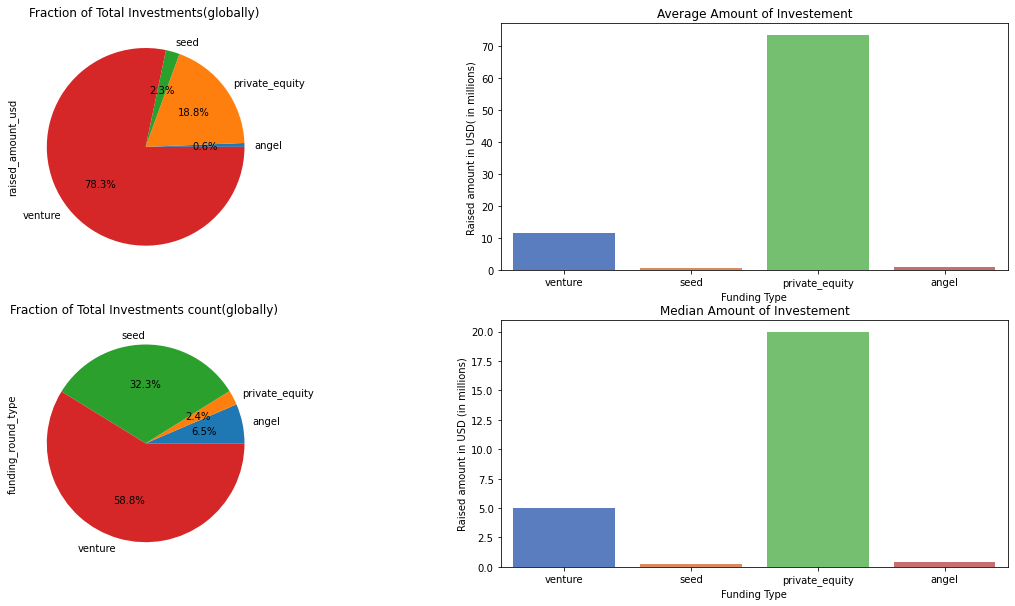

In [1189]:
plt.figure(figsize=(20,10))

plt.subplot(2,2,1)
plt.title('Fraction of Total Investments(globally) ',pad=7)
# grouping data by 'funding_round_type' and adding the 'raised_amount_usd' of each type, then creatring pie chart
master_1.groupby('funding_round_type')['raised_amount_usd'].sum().plot.pie(autopct="%.1f%%")

plt.subplot(2,2,2)
plt.title("Average Amount of Investement") 
# grouping data by 'funding_round_type' and taking mean of the 'raised_amount_usd' of each type, then creatring pie chart
#master_1.groupby(by='funding_round_type')['raised_amount_usd'].mean().plot.bar()

ax = sns.barplot(x=master_1['funding_round_type'], y=master_1['raised_amount_usd']/1_000_000.0, estimator=np.mean, ci=None, palette="muted",orient='v')
ax.set_xlabel("Funding Type")
ax.set_ylabel("Raised amount in USD( in millions)")

plt.subplot(2,2,3)
plt.title('Fraction of Total Investments count(globally) ',pad=7)
# grouping data by 'funding_round_type' and counting each type, then creatring pie chart
master_1.groupby('funding_round_type')['funding_round_type'].count().plot.pie(autopct="%.1f%%")

plt.subplot(2,2,4)
plt.title("Median Amount of Investement") 
# grouping data by 'funding_round_type' and taking median of the 'raised_amount_usd' of each type, then creatring pie chart
#master_1.groupby(by='funding_round_type')['raised_amount_usd'].median().plot.bar()

ax2 = sns.barplot(x=master_1['funding_round_type'], y=master_1['raised_amount_usd']/1_000_000.0, estimator=np.median, ci=None, palette="muted",orient='v')
ax2.set_xlabel("Funding Type")
ax2.set_ylabel("Raised amount in USD (in millions)")


plt.show()

In [26]:
column_to_drop3 = ["emp_title","title"]
loan.drop(labels = column_to_drop3, axis =1, inplace=True)

#### A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

In [1190]:
# top9 DF is the dataframe with top 9 countries data
top9.head(n=10)

,raised_amount_usd
country_code,
USA,4.225108e+11
CHN,3.983542e+10
GBR,2.024563e+10
IND,1.439186e+10
CAN,9.583332e+09
FRA,7.259537e+09
ISR,6.907515e+09
DEU,6.346960e+09
JPN,3.363677e+09


In [1191]:
# adding flags to show if english speaking country
top9['English_Speaking_Flag'] = ['Y','N','Y','Y','Y','N','Y','N','N']

top9.head(n=10)

,raised_amount_usd,English_Speaking_Flag
country_code,,
USA,4.225108e+11,Y
CHN,3.983542e+10,N
GBR,2.024563e+10,Y
IND,1.439186e+10,Y
CAN,9.583332e+09,Y
FRA,7.259537e+09,N
ISR,6.907515e+09,Y
DEU,6.346960e+09,N
JPN,3.363677e+09,N


#### creating a bar plot of top 9 countries along with english speaking flag with different colors to differnetiate the top 3 countrie clearly

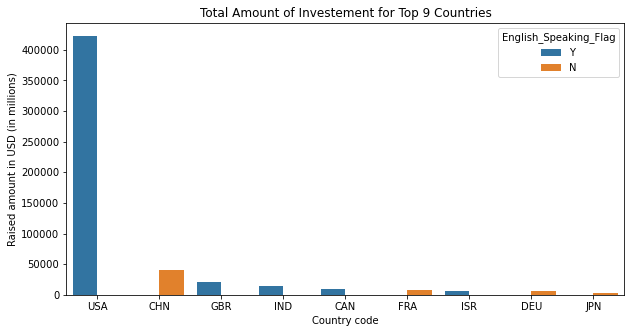

In [1192]:
plt.figure(figsize=(10,5))

# using seaborn barplot to display raised amount of each country along with english speaking as hue
sns.barplot(x=top9.index, y=top9['raised_amount_usd']/1_000_000.0, hue=top9['English_Speaking_Flag'])
plt.xlabel("Country code")
plt.ylabel("Raised amount in USD (in millions)")
plt.title("Total Amount of Investement for Top 9 Countries") 
plt.show()

#### A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). This plot should clearly display the top 3 sectors each in Country 1, Country 2, and Country 3.

In [1193]:
idxs1 = D1.groupby(by='main_sector')['main_sector'].count().sort_values(ascending = False).head(n=3).index
D1_top = D1[D1['main_sector'].isin(idxs1)]

In [1194]:
idxs2 = D2.groupby(by='main_sector')['main_sector'].count().sort_values(ascending = False).head(n=3).index
D2_top = D2[D2['main_sector'].isin(idxs2)]

In [1195]:
idxs3 = D3.groupby(by='main_sector')['main_sector'].count().sort_values(ascending = False).head(n=3).index
D3_top = D3[D3['main_sector'].isin(idxs3)]

In [1196]:
# to do that lets concat all the D1, D2, D3 to single DF so that we can show a bar plot

df = pd.concat([D1_top, pd.concat([D2_top,D3_top])])


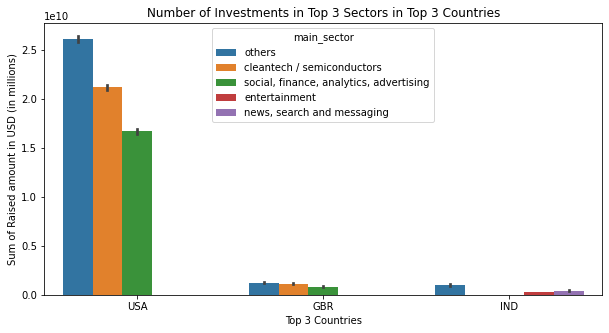

In [1197]:
plt.figure(figsize=(10,5))

# using seaborn barplot to display raised amount of each country along with english speaking as hue
sns.barplot(x='country_code', y='raised_amount_usd', data=df, estimator=np.sum, hue=df['main_sector'])
plt.xlabel("Top 3 Countries")
plt.ylabel("Sum of Raised amount in USD (in millions)")
plt.title("Number of Investments in Top 3 Sectors in Top 3 Countries") 
plt.show()